# Linear SVM, Non-Linear SVM, Regression Trees
By Ervin Guirnela & Marc Valeros

To be discussed:
1. Linear Support Vector Machine (SVM)
2. Non-Linear SVM
3. Regression Trees

By the end of the discussion, we will be able to answer the following questions:
1. What are Linear SVM, Non-Linear SVM and Regression Trees?
2. When do we use each of these methods?
3. What are the advantages and disadvantages of using each method?
4. How do we apply these methods in python?

#Support Vector Machine




 - **Support Vector Machine**, or SVM, is a popular supervised learning algorithm used for both classification and regression tasks.
  
 - The SVM algorithms create the best **decision boundary (hyperplane)** that segregates an n-dimensional space into classes so that we can categorize new data points in the future.


 - The SVM algorithm uses certain extreme data points or vectors known as the **support vectors** to create the hyperplanes so that we get the decision boundary which is at a maximum equal distance from the concerning vectors.

 - SVM algorithm is of two types:

    - **Linear SVM**: When the data points are linearly separable into two classes, the data is called linearly-separable data. We use the linear SVM classifier to classify such data.

    - **Non-linear SVM**: When the data is not linearly separable, we use the non-linear SVM classifier to separate the data points.

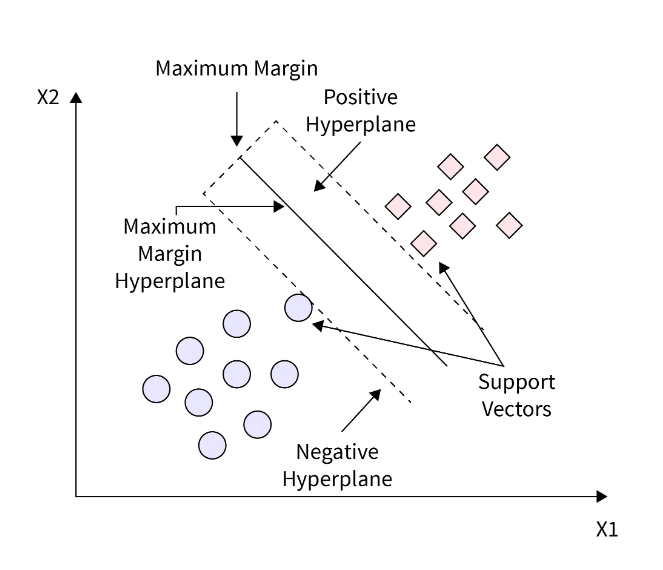

## Types of SVM

### **1. Linear SVM**

**Linear SVM** is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

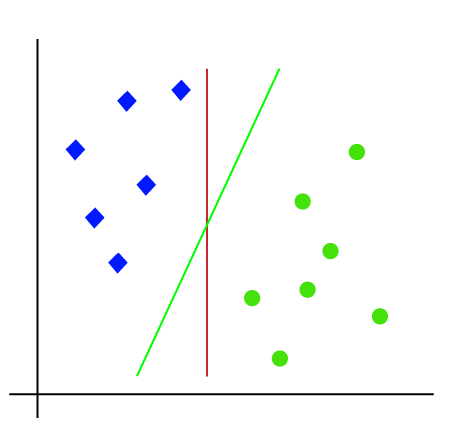

#### **Advantages**

- Linear SVMs are computationally efficient and are often preferred when you have a large dataset because they are faster to train

- Linear SVMs tend to be less prone to overfitting, especially when you have a small number of features relative to the number of samples.

-  Linear SVMs have fewer hyperparameters to tune compared to non-linear SVMs with kernel functions.


#### **Disadvantages**

- Using linear SVM on non-linearly separable classes will not capture complex relationships in the data.

- Linear SVMs are sensitive to outliers, as they aim to find a wide margin hyperplane


### **2. Non-Linear SVM**

**Non-Linear SVM** is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

It takes the data points to a higher dimension to be linearly separable in that dimension, and then the algorithm classifies them.

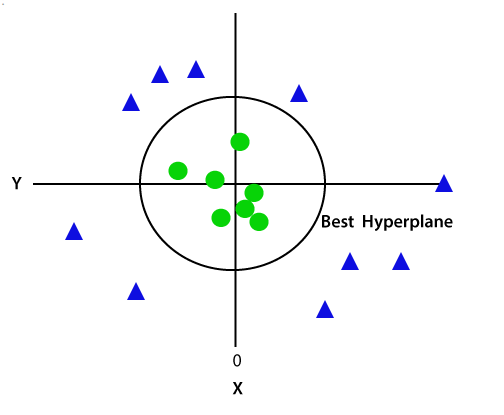

#### **Advantages**

- Non-linear SVMs can model complex, non-linear relationships in data, making them suitable for a wide range of tasks where linear models would fail.

- Provide higher accuracy compared to linear models when the data exhibits non-linear patterns.

- Use a variety of kernel functions to adapt to different types of data, including the Radial Basis Function (RBF) kernel, polynomial kernel, and sigmoid kernel.

#### **Disadvantages**

- Non-linear SVMs can be computationally expensive, especially when dealing with large datasets or complex kernel functions.

- Non-linear SVMs have additional hyperparameters, such as the kernel parameters, which require careful tuning to achieve optimal performance.

## How to identify which one to use?

Visualize Your Data

 - Start by plotting your data. In two dimensions, you can create scatter plots of your data points.

 - In higher dimensions, you can use dimensionality reduction techniques like Principal Component Analysis (PCA) to visualize the data.

 - Look at the scatter plots and see if there is a clear linear separation between the classes or a linear trend in the data.

 - If the data points can be separated or approximated by a straight line or hyperplane, linear models are a good starting point.

## Summary

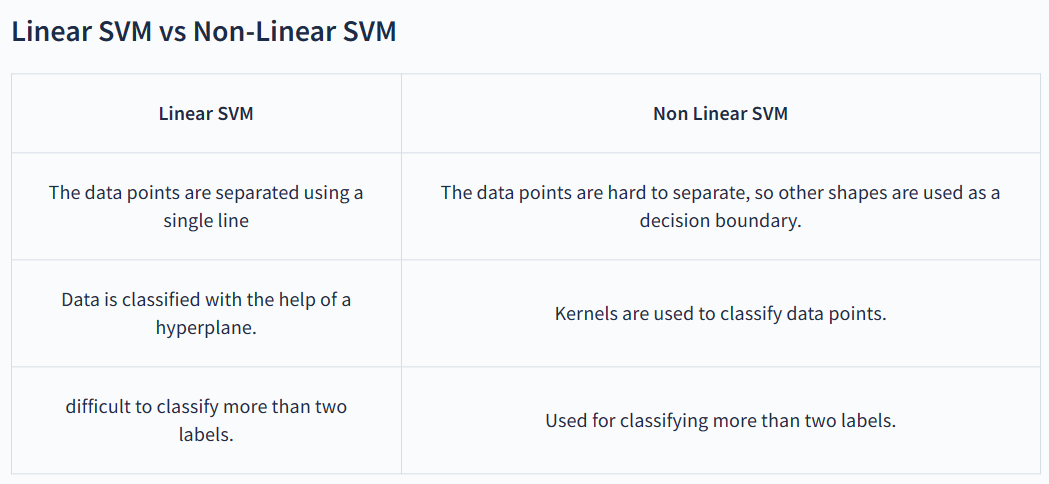

# Regression Trees




A regression tree is similar to a decision tree where the target variable and the algorithm are used to predict **continuous valuable** outputs instead of separate outputs.

**Classification Tree VS Regression Tree**

Regression tree models are built on ordered values with a continuous variable output.  Classification tree models are built on unordered values with dependent variable outputs. If you’re creating a decision tree model to determine how a student performs on a test, the classification tree would show either pass or fail. The regression tree, on the other hand, would show a percentage result.



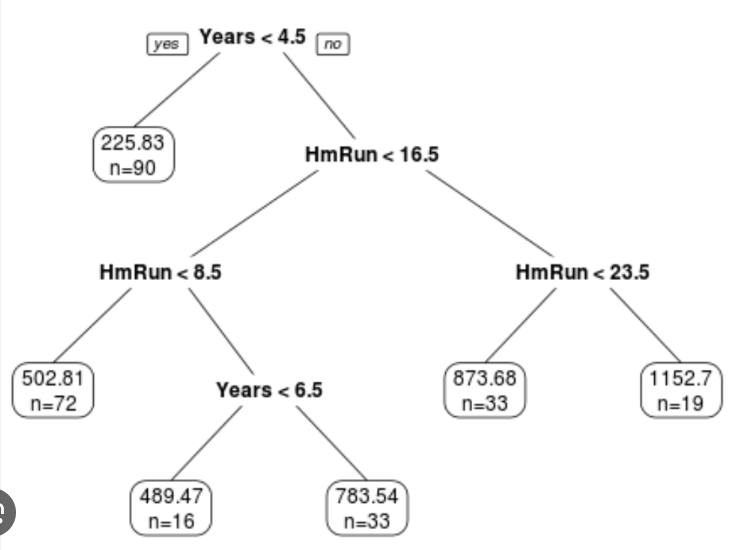

#### **Advantages**

- They’re Easy to Set-Up
- Handle Non-Linear Relationships Efficiently




#### **Disadvantages**
- Regression trees have a high variance, making them unstable
- Not suitable for Very Large Databases

# Python Application of Linear and Non-Linear SVM

In [1]:
# Importing Necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('07_UniversalBank.csv')
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [3]:
# Checking for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
# Dropping ID and ZIP Code columns from the dataset
df1 = df.drop(["ID","ZIP Code"], axis = 1)
df1.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

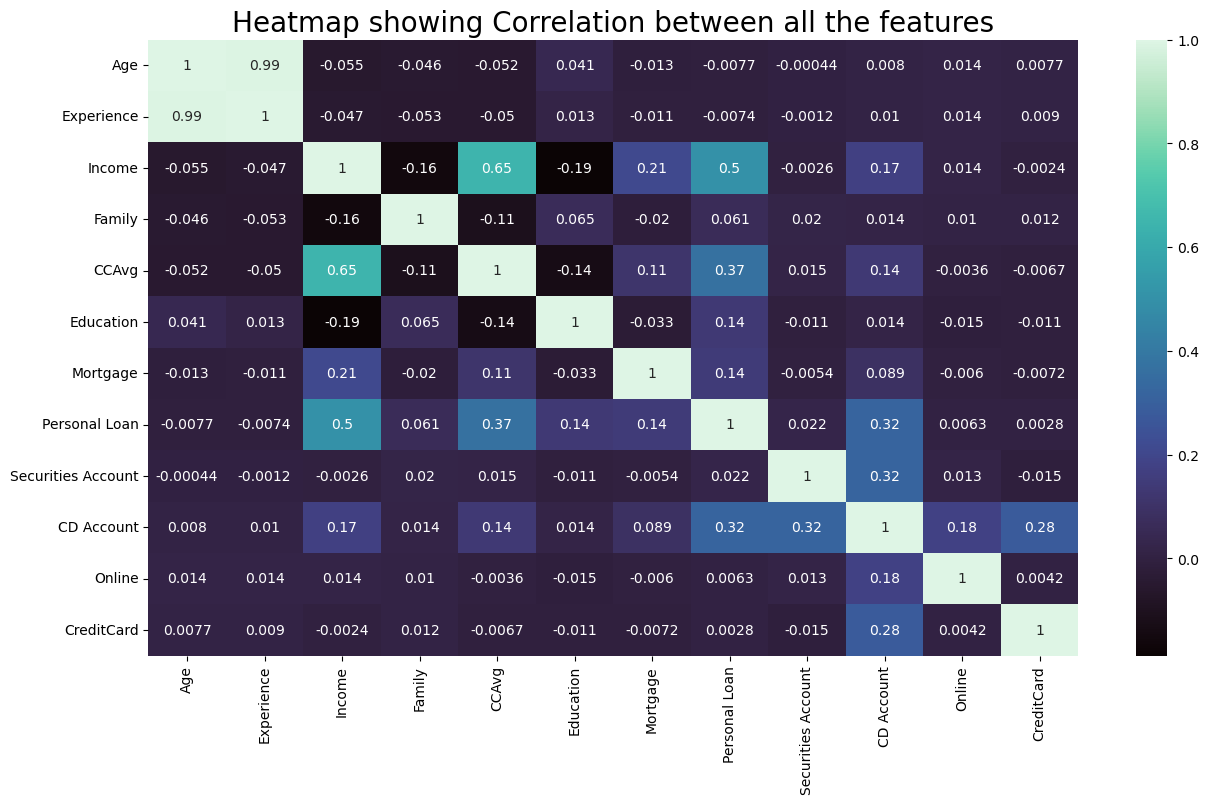

In [5]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df1.corr(),annot = True, cmap='mako')

In [6]:
zero_class = df1[df1.CreditCard==0]
zero_class.shape

(3530, 12)

In [7]:
one_class = df1[df1.CreditCard==1]
one_class.shape

(1470, 12)

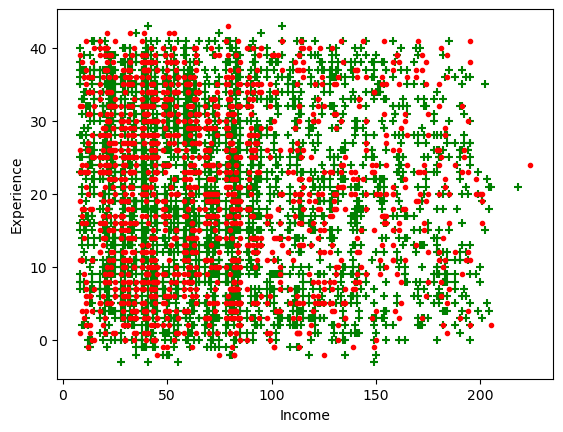

In [8]:
# Income vs Experience scatter plot
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(zero_class['Income'],zero_class['Experience'], color = 'green', marker='+')
plt.scatter(one_class['Income'], one_class['Experience'], color = 'red', marker='.')

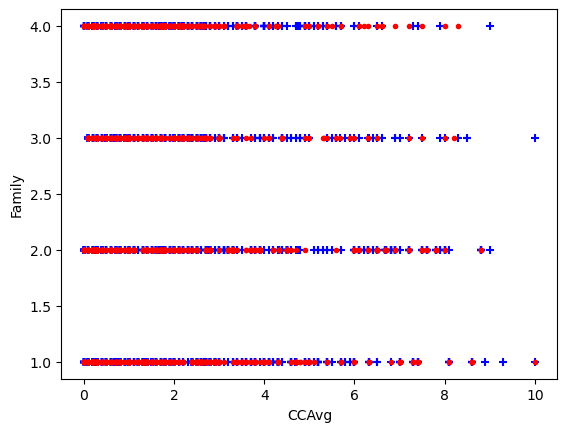

In [9]:
# CCAvg vs Family scatter plot
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(zero_class['CCAvg'],zero_class['Family'], color = 'blue', marker='+')
plt.scatter(one_class['CCAvg'], one_class['Family'], color = 'red', marker='.')

In [10]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit(df1.drop('CreditCard',axis=1)).transform(df1.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df1.columns[:-1])
df_scaled.head()

Age  Experience    Income    Family  CCAvg  Education  Mortgage  \
0  0.045455    0.086957  0.189815  1.000000   0.16        0.0       0.0   
1  0.500000    0.478261  0.120370  0.666667   0.15        0.0       0.0   
2  0.363636    0.391304  0.013889  0.000000   0.10        0.0       0.0   
3  0.272727    0.260870  0.425926  0.000000   0.27        0.5       0.0   
4  0.272727    0.239130  0.171296  1.000000   0.10        0.5       0.0   

   Personal Loan  Securities Account  CD Account  Online  
0            0.0                 1.0         0.0     0.0  
1            0.0                 1.0         0.0     0.0  
2            0.0                 0.0         0.0     0.0  
3            0.0                 0.0         0.0     0.0  
4            0.0                 0.0         0.0     0.0

In [11]:
# Splitting the columns in to dependent variable (x) and independent variable (y).
x = df_scaled
y = df1['CreditCard']

# to be use in grid search
x_cred = df_scaled
y_cred = df1['CreditCard']

# Implimentation of SVM

In [12]:
# Split data in to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.749


<Axes: >

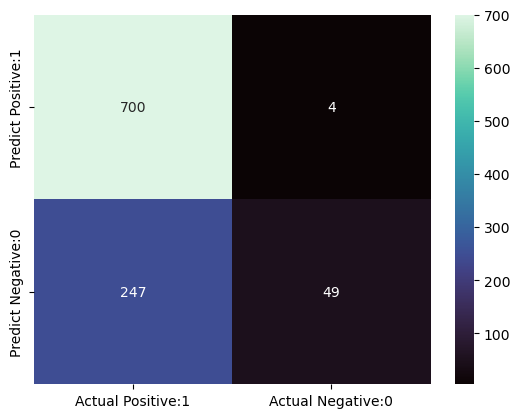

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [15]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



# SVM Kernel Functions

A kernel is a function used in SVM for helping to solve problems. With the help of kernel we can go to higher dimensions and perform smooth calculations. We can go up to an infinite number of dimensions using kernels. Kernel plays a vital role in classification and is used to analyze some patterns in the given dataset. They are very helpful in solving a non-linear problem by using a linear classifier

![Alt text](image.png)

**Linear Kernel**

Linear Kernel Formula
F(x, xj) = sum( x.xj)

Here, x, xj represents the data we’re trying to classify.
Now we will make our svc classifier using a linear kernel.

In [16]:
# Apply SVM model using Linear Kernel function 
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.747


<Axes: >

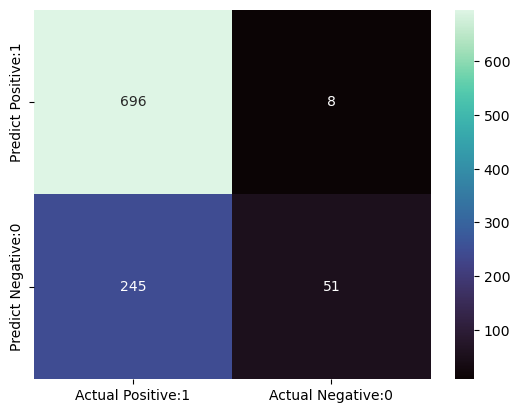

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [18]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.86      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000



**Gaussian RBF Kernel**

Gaussian Radial Basis Formula
F(x, xj) = exp(-gamma * ||x - xj||^2)

The value of gamma varies from 0 to 1. The most preferred value for gamma is 0.1

In [19]:
# Apply SVM model using Gaussian RBF kernel function 
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


<Axes: >

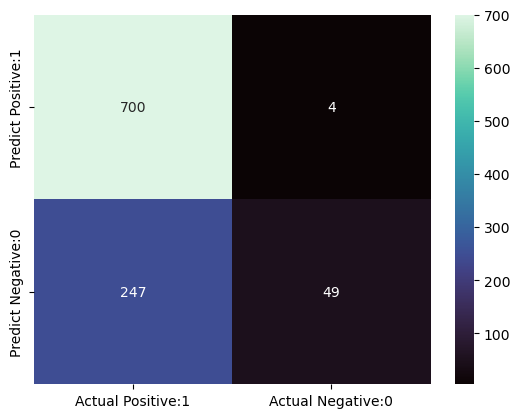

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [21]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



# Python Application of Regression Trees



In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = {
    'Position': [
        'Business Analyst',
        'Junior Consultant',
        'Senior Consultant',
        'Manager',
        'Country Manager',
        'Region Manager',
        'Partner',
        'Senior Partner',
        'C-level',
        'CEO'
    ],
    'Level': [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10
    ],
    'Salary': [
        45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000
    ]
}

df = pd.DataFrame(data)
X = df.iloc[:, 1:2].values
y = df.iloc[:, -1].values

In [24]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [25]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

## Training the Decision Tree model

In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor()

## Predicting a value

In [27]:
regressor.predict([[6.5]])

array([150000.])

## Visualising the model

Text(0.5, 0, 'Level')

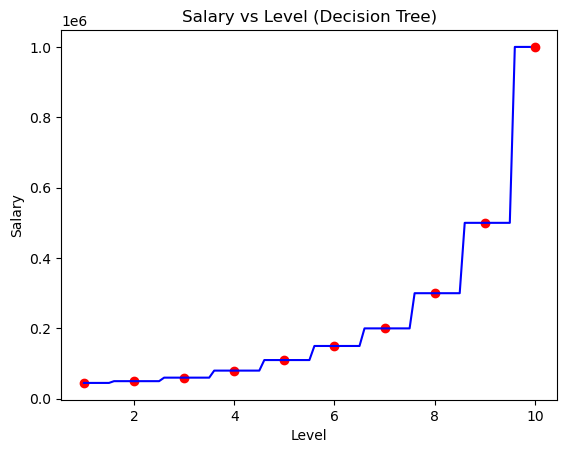

In [28]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Salary vs Level (Decision Tree)')
plt.ylabel('Salary')
plt.xlabel('Level')

# References

https://www.scaler.com/topics/machine-learning/non-linear-svm/

https://www.kaggle.com/code/codeblogger/step-by-step-support-vector-machine-svm

https://rapidminer.com/glossary/regression-trees/

https://github.com/MatheusSchaly/Online-Courses/blob/master/Machine_Learning_A-Z_Hands-On_Python_%26_R_In_Data_Science/1_Regression/Python/5_Decision_Tree_Regression.ipynb

https://www.kaggle.com/code/dasarimohana/universalbank-svm/input?select=UniversalBank.csv

# Exercise

In [29]:
# Fork this repository: https://github.com/marcvaleros/SVM-Regression-Trees
# Experiment on various kernel functions and hyperparameters of the SVM classifier. (https://scikit-learn.org/stable/modules/svm.html#kernel-functions)  
# Identify which SVM classifier performs better (Linear or Non-linear) with the given dataset.
# Check the accuracy of your model.
                                                                                     

## Sigmoid Kernel

In [30]:
sigmoid_svc=SVC(kernel='sigmoid').fit(x_train,y_train)
y_pred = sigmoid_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.602


<Axes: >

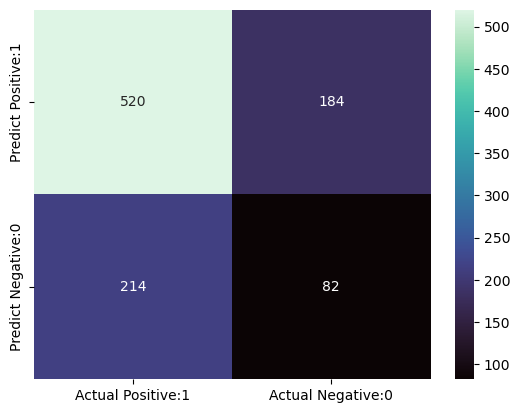

In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [32]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       704
           1       0.31      0.28      0.29       296

    accuracy                           0.60      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.59      0.60      0.60      1000



## Polynomial Kernel

In [33]:
poly_svc=SVC(kernel='poly').fit(x_train,y_train)
y_pred = poly_svc.predict(x_test)
print('Model accuracy with poly kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with poly kernel : 0.749


<Axes: >

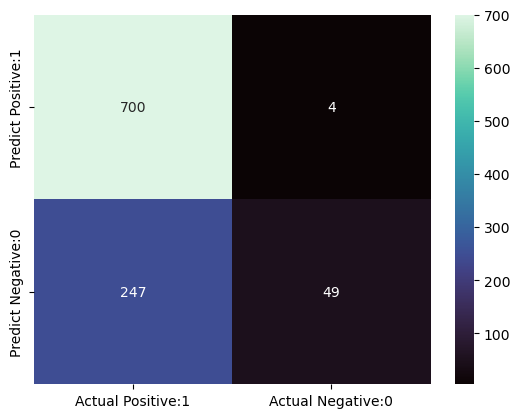

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [35]:

# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



## Gaussian RBF Kernel

In [36]:
# Apply SVM model using Gaussian RBF kernel function 
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


<Axes: >

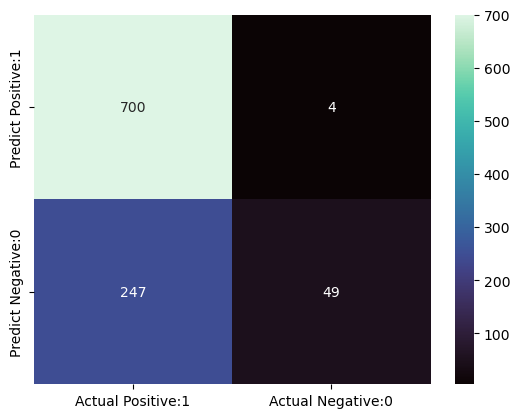

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [38]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000

